# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [56]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [57]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | London Heathrow to Male In...
1,Not Verified | Very good flight following an ...
2,Not Verified | An hour's delay due to late ar...
3,✅ Trip Verified | I booked through BA becaus...
4,✅ Trip Verified | British airways lost bags ...


In [58]:
df["reviews"][0]

'✅ Trip Verified |   London Heathrow to Male In new business class. BA continues to get its mojo back starting with a classy lounge serving innovative, and interesting, quality pre-flight food (beetroot scotch eggs?). Excellent wine (Whispering Angel). Presentation of on-board food has always been a bit hit and miss with BA, but on this occasion it was tasty and OK. Friendly and efficient on board crew. Smile, treat them respectfully, and as equals.  On time flight and early arrival.  Only awarding a 9 because we were bussed from A-C gates, otherwise a really enjoyable experience.'

In [60]:
df.to_csv("BA_reviews.csv")

In [61]:
df.head()

,reviews
0,✅ Trip Verified | London Heathrow to Male In...
1,Not Verified | Very good flight following an ...
2,Not Verified | An hour's delay due to late ar...
3,✅ Trip Verified | I booked through BA becaus...
4,✅ Trip Verified | British airways lost bags ...


In [62]:
df.isnull().sum()

,0
reviews,0


In [63]:
df["reviews"] = df["reviews"].str.split('|', expand=True)[1]

In [64]:
df.head()

,reviews
0,London Heathrow to Male In new business cla...
1,Very good flight following an equally good f...
2,An hour's delay due to late arrival of the i...
3,I booked through BA because Loganair don’t ...
4,British airways lost bags in LHR then found...


In [65]:
import copy
data = copy.deepcopy(df)

In [66]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

# Ensure you have downloaded the stopwords dataset
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove non-alphanumeric characters except sentence delimiters
    text = re.sub(r'[^\w\s\.\!\?]', ' ', text)

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stop words
    words = text.split()
    text = ' '.join(word for word in words if word not in stop_words)

    return text

# Apply the function
data['cleaned_reviews'] = data['reviews'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-  Removed repeated sentence removal logic
-  Kept text preprocessing steps (lowercasing, punctuation removal, stopword removal)

In [67]:
data.head()

,reviews,cleaned_reviews
0,London Heathrow to Male In new business cla...,london heathrow male new business class. ba co...
1,Very good flight following an equally good f...,good flight following equally good flight rome...
2,An hour's delay due to late arrival of the i...,hour delay due late arrival incoming aircraft....
3,I booked through BA because Loganair don’t ...,booked ba loganair representatives manchester ...
4,British airways lost bags in LHR then found...,british airways lost bags lhr found them. sent...


In [68]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return "Positive"
    elif sentiment_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
data['sentiment'] = data['cleaned_reviews'].apply(get_sentiment)

# Check sentiment distribution
print(data['sentiment'].value_counts())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


sentiment
Positive    545
Negative    438
Neutral      17
Name: count, dtype: int64


# Visual Representation

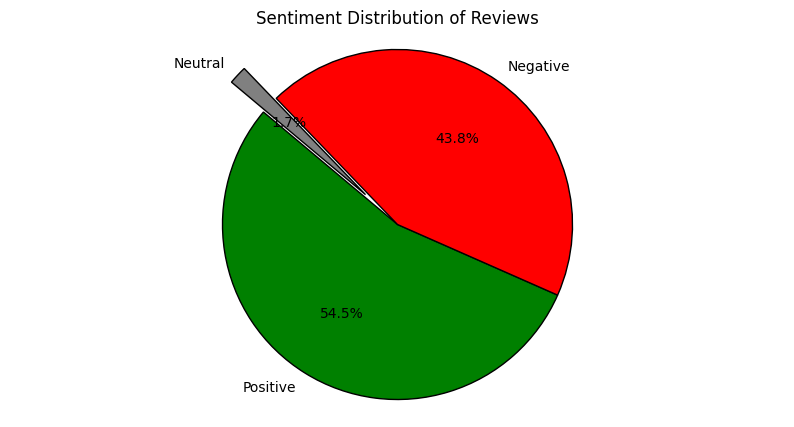

In [69]:
# Plot a pie chart for sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
sentiment_labels = sentiment_counts.index
sentiment_sizes = sentiment_counts.values
sentiment_colors = ['green', 'red', 'gray']  # Custom colors for each sentiment

# Plotting the pie chart
plt.figure(figsize=(10,5))
plt.pie(sentiment_sizes, labels=sentiment_labels, autopct='%1.1f%%',explode = (0, 0, 0.25), startangle=140, colors=sentiment_colors, wedgeprops={'edgecolor': 'black'})
plt.title('Sentiment Distribution of Reviews')
plt.axis('equal')  
plt.show()


# Wordcloud

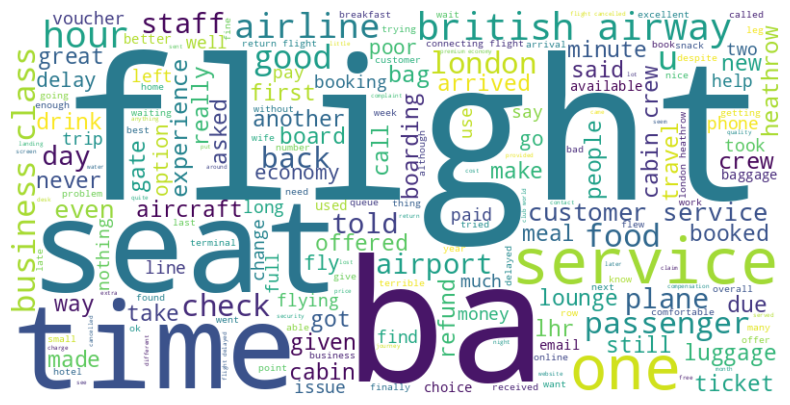

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one text
all_text = " ".join(review for review in data['cleaned_reviews'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
